In [11]:
from numpy import loadtxt
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import pandas as pd
import time
import json
import os 
import shap

import matplotlib.pyplot as plt 

os.chdir('/Users/adrianharris/Desktop/Messy-Data-Project')

path = os.getcwd()

In [12]:
dataset = pd.read_csv('Data/feature_eng_below_5_99s_data.csv')

In [13]:
df = dataset.drop("player", axis=1)

df.head()


,level_overall,level_atk,level_def,level_str,level_constiution,level_range,level_prayer,level_magic,level_cooking,level_wood_cutting,...,total_xp_overall,cluster,Basic_member_pure,Obby_Mauler_Pure,Black_Pure,Turmoil_Proselyte_Pure,Barrows_Pure,Anti_Pure,Summoning_Tank_Defence,Skiller_Pure
0,1521,65,65,63,65,57,55,64,74,65,...,22665814,1,0,0,0,0,0,0,0,0
1,755,64,1,81,74,1,52,30,38,36,...,4669413,1,0,0,0,0,0,0,0,0
2,335,64,41,36,40,57,18,1,1,1,...,784234,1,0,0,0,0,0,0,0,0
3,659,64,62,64,64,44,24,47,1,80,...,3889038,1,0,0,0,0,0,0,0,0
4,1087,64,64,64,65,49,46,50,61,56,...,3695045,1,0,0,0,0,0,0,0,0


In [14]:
# split data into X and y


X = df.loc[:, ~df.columns.isin(['total_xp_overall', 'level_overall'])]
Y = df.loc[:, 'total_xp_overall']

# Training and Testing data
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


In [15]:
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)
score = xgbr.score(X_train, y_train) 
score

0.9993009459889775

In [16]:
scores = cross_val_score(xgbr,X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.90


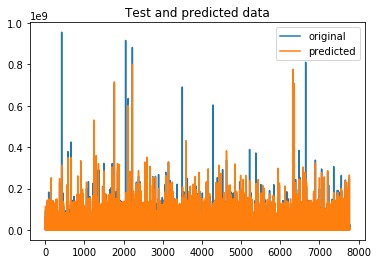

In [17]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


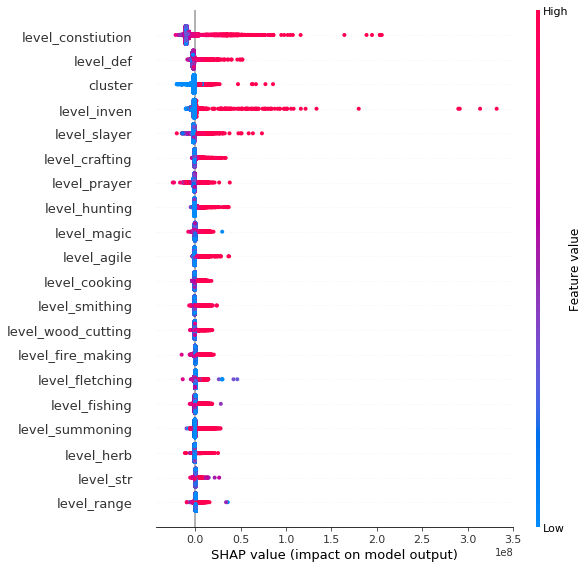

In [18]:
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer.shap_values(X_test)
plot = shap.summary_plot(shap_values,X_test)

In [19]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler 

from scipy import stats

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout

Using TensorFlow backend.


In [21]:

nn_x_train = np.array(X_train)
nn_x_test = np.array(X_test)

nn_y_train = np.array(y_train)
nn_y_test = np.array(y_test)

In [22]:
model = Sequential()
model.add(Dense(20, input_dim = len(nn_x_train[0,:]), activation = 'relu')) 
model.add(Dense(10, activation =  'gelu' ))
model.add(Dense(10, activation =  'gelu' ))
model.add(Dropout(0.8))
model.add(Dense(8, activation =  'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [23]:
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

In [24]:
history = model.fit(x = nn_x_train, y = nn_y_train , validation_split=0.2, epochs = 10, verbose = 1)

Epoch 1/10
395/395 [==============================] - 1s 2ms/step - loss: 2954572988363041.5000 - accuracy: 0.0940 - val_loss: 3096960793837568.0000 - val_accuracy: 0.1087
Epoch 2/10
395/395 [==============================] - 0s 822us/step - loss: 3212750569457436.5000 - accuracy: 0.1105 - val_loss: 3096960793837568.0000 - val_accuracy: 0.1087
Epoch 3/10
395/395 [==============================] - 0s 811us/step - loss: 3257307814918537.0000 - accuracy: 0.1080 - val_loss: 3096960793837568.0000 - val_accuracy: 0.1087
Epoch 4/10
395/395 [==============================] - 0s 810us/step - loss: 3247587084444392.5000 - accuracy: 0.1084 - val_loss: 3096960793837568.0000 - val_accuracy: 0.1087
Epoch 5/10
395/395 [==============================] - 0s 830us/step - loss: 3528800904638257.0000 - accuracy: 0.1087 - val_loss: 3096960793837568.0000 - val_accuracy: 0.1087
Epoch 6/10
395/395 [==============================] - 0s 846us/step - loss: 3275640735046439.0000 - accuracy: 0.1081 - val_loss: 309

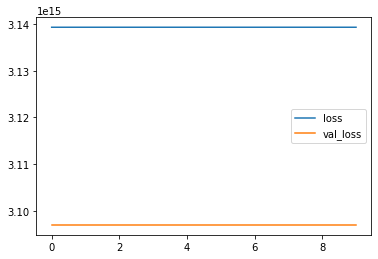

In [25]:
# Training loss 

plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend();

In [26]:
score = model.evaluate(nn_x_train, nn_y_train, batch_size=2048)
print(score)

8/8 [==============================] - 0s 2ms/step - loss: 3130875466219520.0000 - accuracy: 0.1091
[3130875466219520.0, 0.10913239419460297]
